<a href="https://colab.research.google.com/github/vasanthi2469/Python-Training/blob/main/Clustering%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load required libraries
import pandas as pd

# Read your dataset
college = pd.read_csv("/content/Universities (1).csv")

# View the structure of the data
college.info()

# Remove rows with any missing values
college_complete = college.dropna()

# Check how many records are left
len(college_complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

471

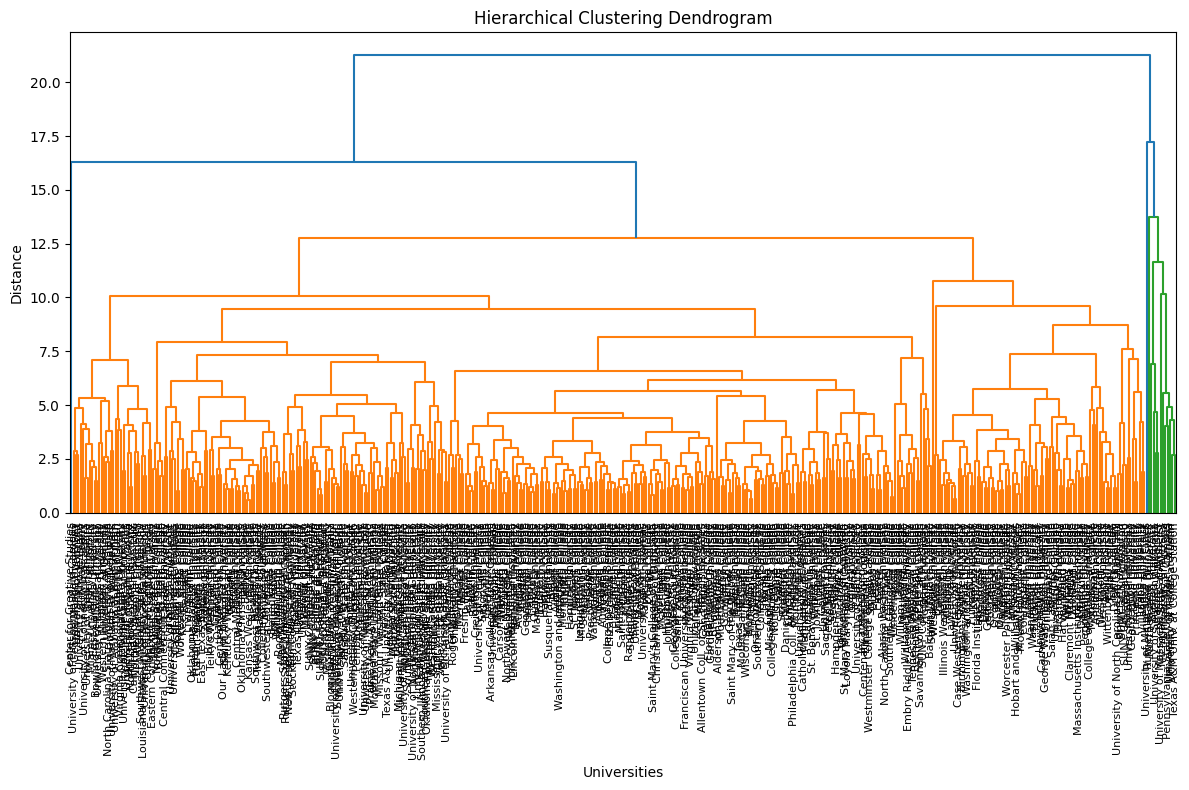

In [ ]:
import pandas as pd
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt

# Assuming 'college_complete' DataFrame is already loaded and processed

# Extract continuous columns (adjust index if needed)
continuous_data = college_complete.iloc[:, 2:18]

# Normalize the continuous data
normalized_data = scale(continuous_data)

# Compute distance matrix
distance_matrix = pdist(normalized_data, metric="euclidean")

# Perform hierarchical clustering using complete linkage
hc = linkage(distance_matrix, method="complete")

# Plot the dendrogram
plt.figure(figsize=(12, 8))  # Increased figure size for better visibility
dendrogram(hc,
           labels=college_complete['College Name'].tolist(),  # Using college names as labels
           leaf_rotation=90,
           leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Universities")
plt.ylabel("Distance")
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

# Choose number of clusters based on the dendrogram
# ... (Visual inspection and analysis) ...

In [ ]:
import pandas as pd
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt

# ... (Previous code for clustering remains the same) ...

# Calculate cluster summary similar to R's dplyr
cluster_summary = college_complete.groupby('cluster').agg({col: 'mean' for col in college_complete.select_dtypes(include=['number']).columns})

# Print the summary statistics
print(cluster_summary)

# ... (Rest of the code, including describe_cluster function, remains the same) ...

         Public (1)/ Private (2)  # appli. rec'd  # appl. accepted  \
cluster                                                              
0                       1.740175     2747.427948       1790.028384   
1                       1.333333    17750.333333      12118.500000   
2                       1.000000    11054.000000       6397.000000   

         # new stud. enrolled  % new stud. from top 10%  \
cluster                                                   
0                  683.451965                 27.810044   
1                 4263.916667                 35.916667   
2                 3524.000000                 26.000000   

         % new stud. from top 25%  # FT undergrad  # PT undergrad  \
cluster                                                             
0                       55.270742     3078.827511      684.052402   
1                       70.250000    20961.583333     3372.416667   
2                       55.000000    16502.000000    21836.000000   

       

In [ ]:
# State distribution across clusters
state_dist = pd.crosstab(college_complete['cluster'], college_complete['State'])
print(state_dist)

# Private/Public distribution across clusters
private_dist = pd.crosstab(college_complete['cluster'], college_complete['Public (1)/ Private (2)'])
print(private_dist)

State    AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
cluster                                          ...                           
0         2   4   4   1  14   6  10   4   2   8  ...   4  15  18   2  15   7   
1         0   0   0   1   1   0   0   0   0   0  ...   0   0   2   0   0   0   
2         0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   

State    WA  WI  WV  WY  
cluster                  
0         2   9   2   1  
1         0   0   0   0  
2         0   0   0   0  

[3 rows x 50 columns]
Public (1)/ Private (2)    1    2
cluster                          
0                        119  339
1                          8    4
2                          1    0


pd.crosstab(): This function is used to create a cross-tabulation (contingency table) between two columns. It shows the frequency of each combination of categories from the two columns.
state_dist = pd.crosstab(college_complete['cluster'], college_complete['State']): This line creates a cross-tabulation between the 'cluster' column and the 'State' column in your college_complete DataFrame. The resulting state_dist DataFrame will show the distribution of states within each cluster.
private_dist = pd.crosstab(college_complete['cluster'], college_complete['Public (1)/ Private (2)']): This line creates a cross-tabulation between the 'cluster' column and the 'Public (1)/ Private (2)' column (assuming this is your Private/Public column). The resulting private_dist DataFrame will show the distribution of private and public universities within each cluster.
print(state_dist) and print(private_dist): These lines print the generated cross-tabulation tables to the console, allowing you to see the distribution of states and private/public universities across your clusters.
This Python code provides the same functionality as the R code you provided, allowing you to analyze the distribution of categorical variables (State and Private/Public) within each cluster of your hierarchical clustering analysis.

 What other external information can explain the contents of some or all of these clusters?  1. Cost of Attendance
You can group colleges by how expensive they are (tuition, room, board, fees).

Example: Some clusters will have high-cost private schools, others affordable public colleges.

2. Selectivity
You can see which schools are hard to get into (low acceptance rate, many top students).

Example: One cluster may contain competitive universities, another open-admission schools.

3. Size of the School
Using the number of students, you can group by big vs. small schools.

Example: Some clusters are large state universities, others are small colleges.

4. Faculty Quality
You can find which schools have more qualified faculty and smaller class sizes.

Example: A cluster might show better faculty-to-student ratios, another fewer PhDs.

5. Graduation Rate
You can see which schools help students graduate on time.

Example: High grad rate = good student support; low grad rate = might need improvement.


In [ ]:
import pandas as pd
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt
import numpy as np

# ... (Previous code for clustering remains the same) ...

# --- Imputing missing values for Tufts University ---

# 1. Extract Tufts University row and available columns
tufts_row = college[college['College Name'] == "Tufts University"]
available_cols = continuous_data.columns[~continuous_data.isnull().any()]

# 2. Normalize Tufts' data using original scaling parameters
center = continuous_data.mean()
scale_val = continuous_data.std()
tufts_norm = (tufts_row.loc[:, available_cols] - center[available_cols]) / scale_val[available_cols]

# 3. Fill missing values with 0 after normalization (temporary)
tufts_norm = tufts_norm.fillna(0)

# 4. Compute cluster centroids (using only available columns)
centroids = college_complete.groupby('cluster')[available_cols].mean()

# 5. Calculate distances and find closest cluster
distances = np.sqrt(((centroids - tufts_norm.values[0])**2).sum(axis=1))
closest_cluster = distances.idxmin()

print(f"Closest cluster to Tufts is: {closest_cluster}")

# 6. Impute missing values using cluster means
# Get columns with missing values for Tufts
missing_cols_tufts = tufts_row.columns[tufts_row.isnull().any().values]
# Impute using the mean of the closest cluster
for col in missing_cols_tufts:
    if col in cluster_summary.columns and col != "College Name": #Check if the column is in the cluster summary and is not College Name
        tufts_row.loc[:, col] = cluster_summary.loc[closest_cluster, col]

# Display the imputed values for Tufts
print("\nImputed values for Tufts University:")
print(tufts_row[missing_cols_tufts])

Closest cluster to Tufts is: 0

Imputed values for Tufts University:
     # PT undergrad
475      684.052402
